In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
img1 = cv2.imread("../DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

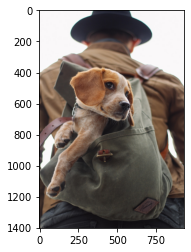

In [55]:
plt.imshow(img1)

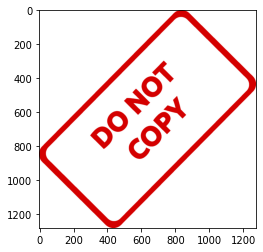

In [56]:
plt.imshow(img2)

In [57]:
img1.shape

(1401, 934, 3)

In [58]:
img2.shape

(1280, 1277, 3)

# BLENDING IMAGES OF THE SAME SIZE

In [59]:
# in order to blend images they must have same size for cv2.addWeighted function

In [60]:
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

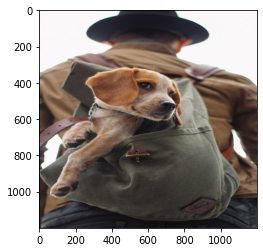

In [61]:
plt.imshow(img1)

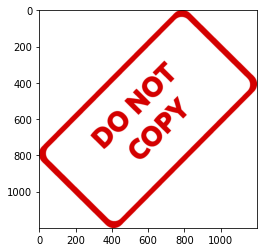

In [62]:
plt.imshow(img2)

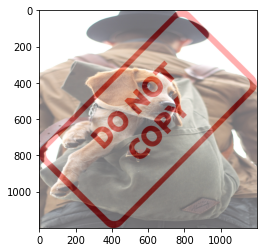

In [63]:
blended = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.4,gamma=0)
plt.imshow(blended)

# Overlaying Images of Different Sizes

In [71]:
img1 = cv2.imread("../DATA/dog_backpack.jpg")
img2 = cv2.imread("../DATA/watermark_no_copy.png")

img2 = cv2.resize(img2, (600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


larger_image = img1
smaller_image = img2

In [ ]:
x_offset = 0
y_offset = 0

x_end = x_offset + smaller_image.shape[1]
y_end = y_offset + smaller_image.shape[0]

In [72]:
img2.shape

(600, 600, 3)

In [73]:
larger_image[0:smaller_image.shape[0], 0:smaller_image.shape[1]] = smaller_image

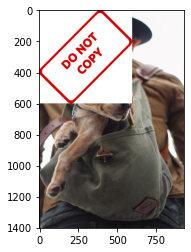

In [74]:
plt.imshow(larger_image)

# Creating Region of Interest

In [76]:
img1 = cv2.imread("../DATA/dog_backpack.jpg")
img2 = cv2.imread("../DATA/watermark_no_copy.png")

img2 = cv2.resize(img2, (600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [77]:
img1.shape

(1401, 934, 3)

In [78]:
img2.shape

(600, 600, 3)

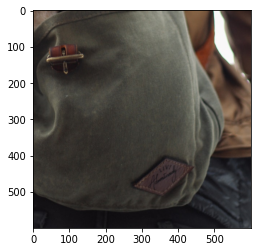

In [82]:
x_offset=934-600
y_offset=1401-600

roi_img1 = img1[y_offset:1401, x_offset:934]

plt.imshow(roi_img1)

# Creating Mask

In [83]:
# Mask allows us to capture only red portion of the do not copy image

In [87]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2gray.shape

(600, 600)

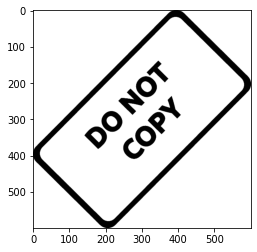

In [88]:
plt.imshow(img2gray, cmap = "gray")

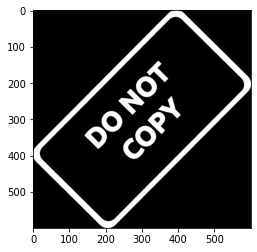

In [91]:
img_mask = cv2.bitwise_not(img2gray) # Inverts every bit of an array.
plt.imshow(img_mask, cmap = "gray")

# Convert Mask to have 3 channels

In [93]:
white_background = np.full(img2.shape, 255, dtype = np.uint8)

In [94]:
back_ground = cv2.bitwise_or(white_background, white_background, mask = img_mask)

In [95]:
back_ground.shape

(600, 600, 3)

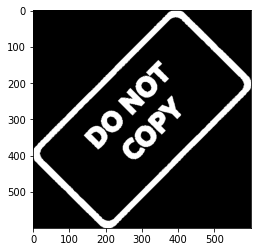

In [96]:
plt.imshow(back_ground)

# Grab Original FG image and place on top of Mask